> Do NOT rename this file.  Simply enter your name below:

Name: **Vee Kalkunte**

 A travel business has surveyed a sample of clients over the past month.  See the dataset "satisfaction.xlsx".  

- "id" : client id in system
- "gender" : male or female
- "age" : age of client in years
- "dcode" : demographic booking code
- "group" : size of group in trip 
- "alone" : traveled alone 
- "region" : region of state
- "pkg" : list of promotional package(s) used, if any.  space delimited.
- "invoice" : revenue in USD from trip 
- "luxury" : luxury level (1 = luxury, 2 = standard,  3=budget )
- "sat" : satisfaction classification target (negative (not satisfied), positive (satisfied))

Your job is to develop a classification model to predict the *satisfaction* of clients given the descriptive features presumably to help your business solicit online recommendations and target customers for future business engagements.

1. Perform Exploratory Data Analysis
2. Derive a KNN classification model 
3. Analyze/evaluate/compare the performance of your model.
4. Summarize your final results.
5. Compare to other classification models


# Exercise 1:  Exploratory Data Analysis

1. Explore your data.  
2. State your obvservations derived from your exploration.  Use markdown cells to annotate your exploration with your observations.
3. Add one last markdown cell to identify the feature(s) you feel are most relevant to the classification of "satisfaction".

In [201]:
# your exploration starts here and may have addition cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

cantGetNo = pd.read_excel('satisfaction.xlsx')
print("Here's a general look at our Data:")
print(cantGetNo.head()) # quick check into what the data looks like
print()
print(cantGetNo.info())

Here's a general look at our Data:
      id  gender   age  dcode  group  alone region   pkg  invoice  luxury  sat
0  193b7    male  32.0      1      2      0      S   NaN    110.0       3  neg
1  13cfa  female  48.0      2      2      0      C   C85   3210.0       1  pos
2  2f499  female  36.0      0      1      1      S   NaN    120.0       3  pos
3  282f0  female  45.0      2      2      0      S  C123   2390.0       1  pos
4  9a830    male  45.0      1      1      1      S   NaN    120.0       3  neg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       985 non-null    object 
 1   gender   985 non-null    object 
 2   age      985 non-null    float64
 3   dcode    985 non-null    int64  
 4   group    985 non-null    int64  
 5   alone    985 non-null    int64  
 6   region   983 non-null    object 
 7   pkg      260 non-null    object 
 8   

A Series of basic trends:

Most of our travelers are from the south
region
C    202
N     48
S    733
Name: id, dtype: int64

Most of our travelers are Men
gender
female    357
male      628
Name: id, dtype: int64

Most of our travelers are between 30 and 40


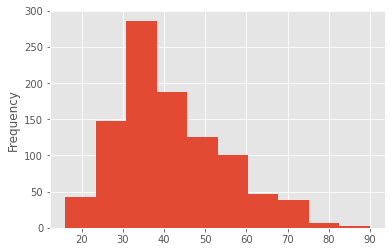


Most of our travelers fell into demographic code 1, with 0 and 2 being next most common
dcode
0    180
1    579
2    169
3     25
4     32
Name: id, dtype: int64

Most of our travelers moved alone, with one rather large exception at 11
count    985.000000
mean       1.801015
std        1.349119
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: group, dtype: float64

However, most women traveled with others, while most men traveled alone
gender  alone
female  0        207
        1        150
male    0        190
        1        438
Name: id, dtype: int64

Most of them get the budget experience
luxury
1    279
2    244
3    462
Name: id, dtype: int64

Most People don't have a package
hasPkg
False    725
True     260
Name: id, dtype: int64


In [202]:
print("A Series of basic trends:")

print()
print("Most of our travelers are from the south")
print(cantGetNo.groupby('region').count().id)

print()
print("Most of our travelers are Men")
print(cantGetNo.groupby('gender').count().id)

print()
print("Most of our travelers are between 30 and 40")
cantGetNo['age'].plot.hist()
plt.show()

print()
print("Most of our travelers fell into demographic code 1, with 0 and 2 being next most common")
print(cantGetNo.groupby('dcode').count().id)

print()
print("Most of our travelers moved alone, with one rather large exception at 11")
print(cantGetNo['group'].describe())

print()
print("However, most women traveled with others, while most men traveled alone")
print(cantGetNo.groupby(['gender', 'alone']).count().id)

print()
print("Most of them get the budget experience")
print(cantGetNo.groupby(['luxury']).count().id)

#creating a new column - do they have a package or not
import math
hasPkg = []
for i in cantGetNo['pkg']:
    if str(i) == "nan":
        hasPkg.append("False")
    else: 
        hasPkg.append("True")
cantGetNo['hasPkg'] = hasPkg

print()
print("Most People don't have a package")
print(cantGetNo.groupby(['hasPkg']).count().id)

Now to see the distribution of revenue:

Observing the heavy left leaning distribution of revenue...


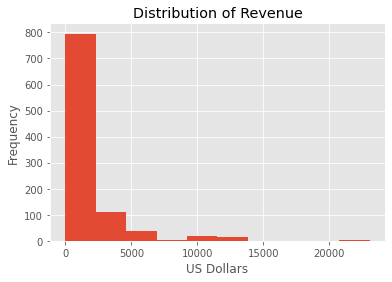


We earn the most revenue from people with packages
hasPkg
False     546.477901
True     3845.115385
Name: invoice, dtype: float64

And from people who by the most luxurious seating
luxury
1    4136.200717
2     642.418033
3     183.579176
Name: invoice, dtype: float64

With those who buy luxury and have a package being the most lucrative
hasPkg  luxury
False   1         3565.434783
        2          654.052863
        3          184.412417
True    1         4248.884120
        2          487.058824
        3          146.000000
Name: invoice, dtype: float64


In [203]:
print("Now to see the distribution of revenue:")

print()
print("Observing the heavy left leaning distribution of revenue...")
plt.title("Distribution of Revenue")
plt.xlabel("US Dollars")
plt.ylabel("Frequency")
cantGetNo['invoice'].plot.hist()
plt.show()

print()
print("We earn the most revenue from people with packages")
print(cantGetNo.groupby(['hasPkg']).mean().invoice)

print()
print("And from people who by the most luxurious seating")
print(cantGetNo.groupby(['luxury']).mean().invoice)

print()
print("With those who buy luxury and have a package being the most lucrative")
print(cantGetNo.groupby(['hasPkg', 'luxury']).mean().invoice)

Now observing the patterns of satisfaction:

Most of our travelers are not satisfied
sat
neg    728
pos    257
Name: id, dtype: int64

Most men were not satisfied, in particular
gender  sat
female  neg    177
        pos    180
male    neg    551
        pos     77
Name: id, dtype: int64

People who traveled alone also were more dissatisfied
alone  sat
0      neg    269
       pos    128
1      neg    459
       pos    129
Name: id, dtype: int64

By luxury, 40 percent of our customers are unsatisfied budget fliers
With only ~25% of our customers being satisfied in the first place


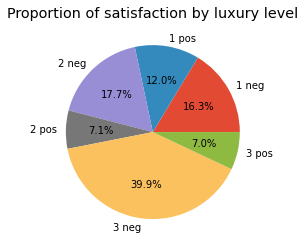

In [204]:
print("Now observing the patterns of satisfaction:")

print()
print("Most of our travelers are not satisfied")
print(cantGetNo.groupby('sat').count().id)

print()
print("Most men were not satisfied, in particular")
print(cantGetNo.groupby(['gender', 'sat']).count().id)

print()
print("People who traveled alone also were more dissatisfied")
print(cantGetNo.groupby(['alone', 'sat']).count().id)

print()
print("By luxury, 40 percent of our customers are unsatisfied budget fliers")
print("With only ~25% of our customers being satisfied in the first place")
satLux = pd.DataFrame(cantGetNo.groupby(['luxury', 'sat']).count().id)
satLux['ofTotalProp'] = [(i/len(cantGetNo)) for i in satLux['id']]
plt.pie(satLux.ofTotalProp, labels = [str(i[0]) + " " + str(i[1]) for i in satLux.index], autopct='%1.1f%%')
plt.title("Proportion of satisfaction by luxury level")
plt.show()

print()

Likely the inclusion of both group and alone produces multicolinearity; for a good model, we should only pick one


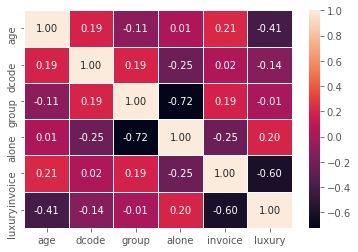

In [205]:
sns.heatmap(cantGetNo.corr(), annot=True, fmt=".2f", linewidths=0.5)
print("Likely the inclusion of both group and alone produces multicolinearity; for a good model, we should only pick one")

In [206]:
print("And for some other misc. information:")
import pandas_profiling as pp

#pp.ProfileReport(cantGetNo)

And for some other misc. information:


In [207]:
print("The Variables used will be the following: ID, Gender, Age, Alone, Luxury, Invoice, Region, hasPkg")
print()
print("Note: dcode and gender seem to show multicolinarity; we're keeping gender, since its results are easier to understand.")

The Variables used will be the following: ID, Gender, Age, Alone, Luxury, Invoice, Region, hasPkg

Note: dcode and gender seem to show multicolinarity; we're keeping gender, since its results are easier to understand.


# Exercise 2: Data Engineering 

Prepare for a KNN classification model to predict "satisfaction" given the EDA you preformed above:

* dropping irrelavant columns based on your EDA above, 
* identify and remove outlier rows (if any)
* identify and remove any duplicate rows (if any)
* converting categorical values to numeric values, 
* normalizing numeric values to similar/same ranges using StandardScaler or MinMaxScaler
* isolate your features matrix (X) and your target labels (y)
* split the data for training and testing




In [208]:
cantGetNo.dropna() #drop the null values
cantGetNo.drop_duplicates() #drop duplicate rows
#removing that row with 11 people (abnormally large)
cleaning = cantGetNo[cantGetNo['group'] < 6] #so drop everything else
#removing 0s from the invoice data 
cleaning = cantGetNo[cantGetNo['invoice'] != 0]
print(cleaning.dtypes)

#convert categorical values to numeric values
#PLEASE NOTE THAT Male is 0, Female is 1
gen = []
for g in cleaning['gender']:
    if g == "male":
        gen.append(0)
    else: gen.append(1)
cleaning['gender'] = gen
    
#PLEASE NOTE THAT Negative satisfaction is 0, positive is 1
satis = []
for s in cleaning['sat']:
    if s == "neg":
        satis.append(0)
    else: satis.append(1)
cleaning['sat'] = satis

#PLEASE NOTE THAT Regions: C = 1, N = 2, S = 3
reg = []
for r in cleaning['region']:
    if r == "C":
        reg.append(1)
    elif r == "N":
        reg.append(2)
    else: reg.append(3)
cleaning['region'] = reg

#PLEASE NOTE THAT has package is 1, does not have package is 0
hasP = []
for h in cleaning['hasPkg']:
    if h == "False": hasP.append(0)
    else: hasP.append(1)
cleaning['hasPkg'] = hasP

#remove the things we don't want
cleaning = cleaning.drop(['id','group', 'pkg', 'dcode'], axis = 1)
cleaning = cleaning.dropna() #drop the null values
cleaning = cleaning.drop_duplicates() #drop duplicate rows
print(cleaning.head())

#split the data into features and target
x = cleaning.drop(['sat'], axis = 1)
y = cleaning['sat'].values

#normalize numeric values to similar values using standardscalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
xScaled = scaler.fit_transform(x)

#split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xScaled,y,test_size=0.4,random_state=42, stratify=y)

id          object
gender      object
age        float64
dcode        int64
group        int64
alone        int64
region      object
pkg         object
invoice    float64
luxury       int64
sat         object
hasPkg      object
dtype: object
   gender   age  alone  region  invoice  luxury  sat  hasPkg
0       0  32.0      0       3    110.0       3    0       0
1       1  48.0      0       1   3210.0       1    1       1
2       1  36.0      1       3    120.0       3    1       0
3       1  45.0      0       3   2390.0       1    1       1
4       0  45.0      1       3    120.0       3    0       0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# Excerise 3:  Prepare Your Model

Prepare and train/fit the KNN classifier to predict customer satisfaction.

* identify the most optimal K in KNN by testing/plotting several. 

* prepare the trained/fitted model with optimal k

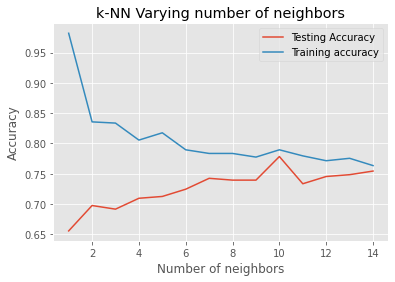

Notice maximum accuracy at 10 nearest neighbors


In [209]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

print("Notice maximum accuracy at 10 nearest neighbors")

# Excerise 4: Evaluate your model

Score your model by doing the following:
    
* evaluate the final precision of your model with optimal k
* plot the confusion matrix generated from you model on the test data
* can you achieve or exceed this precision with fewer feature columns in you X matrix?
* compare to other classification methods (show bar chart by method).


In [210]:
#find our precision
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#plot our confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Checking for other variables: there isn't a more efficient model with fewer variables

[[211  24]
 [ 50  49]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       235
           1       0.67      0.49      0.57        99

    accuracy                           0.78       334
   macro avg       0.74      0.70      0.71       334
weighted avg       0.77      0.78      0.77       334



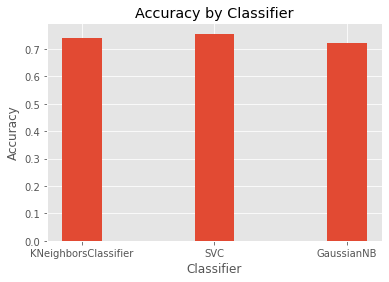

In this case, SVC Seems to have the highest mean accuracy and the lowest standard deviation


In [211]:
#Check for the correct model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

estimators = {'KNeighborsClassifier': knn,
               'SVC': SVC(gamma='scale'),
               'GaussianNB': GaussianNB()}

names, means, stds = [], [], []
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X_train, y=y_train, cv=kfold)
    names.append(estimator_name)
    means.append(scores.mean())
    stds.append(scores.std())
    #print(f'{estimator_name:>20}: ' + f'mean accuracy= {scores.mean():.2%}; ' + f'standard deviation= {scores.std():.2%}')

import numpy as np

width =0.3
index = np.arange(3)
plt.bar(names, means, width=width, label = names)
#plt.bar(names, stds, width=width, label = names)
plt.title("Accuracy by Classifier")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()
print("In this case, SVC Seems to have the highest mean accuracy and the lowest standard deviation")

# Exercise 5: Use your model

Use your model to predict the satisfaction of each hypothetical customers found in predict_sat.xlsx file.


In [212]:
predict = pd.read_excel('predict_sat.xlsx')
print(len(predict))
predict = predict.dropna()
predict = predict.drop_duplicates()

#add in has package column
hasPkg = []
for i in predict['pkg']:
    if str(i) == "nan":
        hasPkg.append("False")
    else: 
        hasPkg.append("True")
predict['hasPkg'] = hasPkg

#convert categorical values to numeric values
#PLEASE NOTE THAT Male is 0, Female is 1
gen = []
for g in predict['gender']:
    if g == "male":
        gen.append(0)
    else: gen.append(1)
predict['gender'] = gen
    
#PLEASE NOTE THAT Negative satisfaction is 0, positive is 1
satis = []
for s in predict['sat']:
    if s == "neg":
        satis.append(0)
    else: satis.append(1)
predict['sat'] = satis

#PLEASE NOTE THAT Regions: C = 1, N = 2, S = 3
reg = []
for r in predict['region']:
    if r == "C":
        reg.append(1)
    elif r == "N":
        reg.append(2)
    else: reg.append(3)
predict['region'] = reg

#PLEASE NOTE THAT has package is 1, does not have package is 0
hasP = []
for h in predict['hasPkg']:
    if h == "False": hasP.append(0)
    else: hasP.append(1)
predict['hasPkg'] = hasP

x = predict.drop(['id','group', 'pkg', 'dcode', 'sat'], axis = 1)
y = predict['sat']
xScaled = scaler.fit_transform(x)

y_pred=knn.predict(xScaled)
print('Accuracy = ', knn.score(xScaled,y))  

5
Accuracy =  0.5


# Exercise 6:  Classification Insights

What insights have you gained?   Make a bulleted list in this markdown cell.

* Our model was significantly more accurate with the test/train set than the simulation outside of it
* We may be in a situation with overfitting? There might be a chance that dropping our variables to fewer would improve our accuracy.

---

# Exercise 7:  Linear Regression

Consider the data found in "lin_data.xlsx". 

1. Analyze and prepare the data for linear regression.  
     * Impute interpolated values for any isolated missing values.
     * Remove statistical outliers
     
     
2. Perform linear regression using the scipy stats module.
    * visualize the data with the regression line
    * provide the equation of the regression line
    * use the regression line to predict the y value at x = 5.0
    
    
3. Repeat the analysis of step2 the sklearn machine learning approach.


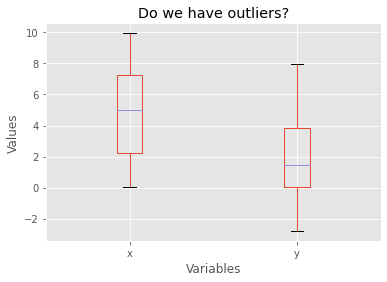

In [339]:
linear = pd.read_excel('lin_data.xlsx')
linear.sort_values(by = 'x')

#interpolate the missing values
nanList = list(linear.index[linear['y'].isna()])

for i in nanList:
    substitute = (linear['y'].iloc[(i-1)] + linear['y'].iloc[(i+1)])
    linear['y'].iloc[i] = float(substitute*.5)

#remove the outliers
linear.plot.box() #no outliers indicated by astericks on a boxplot
plt.title("Do we have outliers?")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(linear['x'].values.reshape(-1,1), linear['y'])

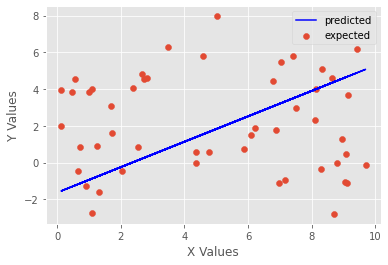

y = 0.692128004340232*x + -1.6381333678236594
At x = 5: y = 1.8225066538775008


In [274]:
#Perform linear regression using the scipy stats module.
from scipy import stats
linear_regression = stats.linregress(x=linear['x'],y=linear['y'])

def linRegEst(x,linear_regression):
    return linear_regression.slope*x+linear_regression.intercept

#and plot it
predicted = [linRegEst(xx, linear_regression) for xx in X_test]
expected = y_test
plt.scatter(X_test, expected, label = "expected")
plt.plot(X_test, predicted, label = "predicted", color = 'blue')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

#provide the equation of the regression line
print("y = " + str(linear_regression.slope) +"*x + " + str(linear_regression.intercept))
#use the regression line to predict the y value at x = 5.0
print("At x = 5: y = " + str(linRegEst(5.0, linear_regression)))

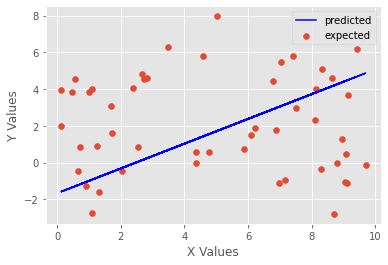

y = 0.6745028429649103*x + -1.6739724073164532
At x = 5: y = 1.698541807508098


In [268]:
#Now do it with the linear model sklearn
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression() 
linear_regression=linear_regression.fit(X=X_train, y=y_train)
coef = linear_regression.coef_
intercep = linear_regression.intercept_

#visualize the data with the regression line
predicted = (linear_regression.predict(X_test))
expected = y_test
y_test = y_test.sort_values()
plt.scatter(X_test, expected, label = "expected")
plt.plot(X_test, predicted, label = "predicted", color = 'blue')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

#provide the equation of the regression line
print("y = " + str(coef[0]) +"*x + " + str(intercep))
#use the regression line to predict the y value at x = 5.0
print("At x = 5: y = " + str(coef[0]*5+intercep))

# Exercise 8:  Sea Level

Refer to the following site:  https://tidesandcurrents.noaa.gov/sltrends/

The site provides global time series based data for sea levels. Use their Trend Tables  link to access tables listing sea-level time series for cities in the U.S. and worldwide. 

The date ranges available vary by city. Choose several cities for which 100% of the data is available (as shown in the % Complete column). 

Clicking the link in the Station ID column displays a table of time series data, which you can then export to your system as a CSV file. 

Use the preparation and plotting techniques you learned in chapter 15 to load and plot each dataset on the same diagram using Seaborn’s regplot function. 

Do the sea level rises match in each location?


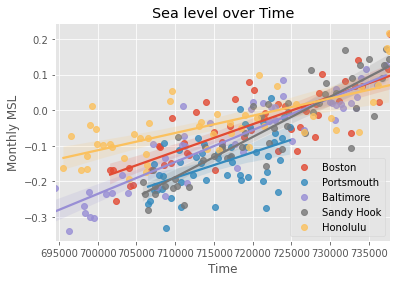

There seems to be sea level rises across each line, but not a steady amount: Baltimore has the highest, and Honolulu has the least.


In [336]:
from datetime import datetime

boston = pd.read_csv(r'8443970_meantrend.csv', index_col = False)
portsmouth = pd.read_csv(r'8638660_meantrend.csv', index_col = False)
baltimore = pd.read_csv(r'8574680_meantrend.csv', index_col = False)
sandyHook = pd.read_csv(r'8531680_meantrend.csv', index_col = False)
honolulu = pd.read_csv(r'1612340_meantrend.csv', index_col = False)

cityset = [boston, portsmouth, baltimore, sandyHook, honolulu]
cities = ["Boston", "Portsmouth", "Baltimore", "Sandy Hook", "Honolulu"]

#adding the ordinal dates & plotting
for j in range(0, len(cityset)):
    c = cityset[j]
    date = []
    for i in range(0, len(c)):
        y = c['Year'].iloc[i]
        m = c[' Month'].iloc[i]
        this = str(m) + "-"+str(y)
        date.append(datetime.strptime(this, '%m-%Y').toordinal())
    c['date'] = date
    sns.regplot(x = "date", y = " Monthly_MSL", data = c.sample(50), label = cities[j])
    
plt.title("Sea Level Change Over Time")
plt.ylabel("Monthly MSL (Sea Change)")
plt.xlabel("Time")
plt.legend()
plt.show()
print("There seems to be sea level rises across each line, but not a steady amount: Baltimore has the highest, and Honolulu has the least.")

# Exercise 9: 

Select one of your stations and use sklearn to perform the linear regression with sklearn in order to derive the line equation for the sea level trend at that station with respect . 

Use your equation to predict the sea level January of 2030?  2040? 



In [338]:
#split it - select Boston
X_train, X_test, y_train, y_test = train_test_split(boston.date.values.reshape(-1, 1), boston[' Monthly_MSL'].values, random_state=11)

linear_regression = LinearRegression() 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_regression=linear_regression.fit(X=X_train, y=y_train)

coef = linear_regression.coef_[0]
intercept = linear_regression.intercept_

#print(coef, intercept)

predict = (lambda x:coef* x +intercept)
print("January 2030: ", predict(datetime.strptime("1-2030", '%m-%Y').toordinal()))
print("January 2040: ", predict(datetime.strptime("1-2040", '%m-%Y').toordinal()))

7.926413694814865e-06 -5.746476475612847
January 2030:  0.12761433251316312
January 2040:  0.15656159532662706


# Exercise 10: Predicting Consumer Price Index 

The Consumer Price Index (CPI) is a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services.

Refer to CPIHOSNS.xls 

Perform simple EDO and linear regression to model the housing CPI with respect to time.
Use a markdown cell to provide the equation of your regression line. 

Use python to evaluate your equation to predict the CPI in December of 2022. 


In [369]:
cpi = pd.read_excel('CPIHOSNS.xls', index_col = False)
cpi.columns = ['date', 'priceIndex']
cpi = cpi.drop(cpi.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

ordDate = []
for d in cpi['date']:
    ordDate.append(d.toordinal())
cpi['ordDate'] = ordDate
#print(cpi.head())

X_train, X_test, y_train, y_test = train_test_split(cpi.ordDate.values.reshape(-1, 1), cpi.priceIndex.values, random_state=11)

linear_regression = LinearRegression() 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_regression=linear_regression.fit(X=X_train, y=y_train)

coef = linear_regression.coef_[0]
intercept = linear_regression.intercept_

#print(coef, intercept)

predict = (lambda x:coef* x +intercept)
print("Dec 2022: " + str(predict(datetime.strptime("12-2022", '%m-%Y').toordinal())))

Dec 2022: 275.9900546002027


Line: 

y = ordinalDate * 0.012616478252266352 - 9041.152969915976